In [ ]:
#retrieve data

In [39]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [40]:
import opendatasets as od

In [41]:
dataset = 'https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot'

In [42]:
od.download(dataset)

Skipping, found downloaded files in "./melbourne-housing-snapshot" (use force=True to force download)


In [117]:
import os
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data_dir = "./melbourne-housing-snapshot"

In [51]:
os.listdir(data_dir)

['melb_data.csv']

In [53]:
melhousing_df = pd.read_csv('melb_data.csv')
print(melhousing_df)

              Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

In [55]:
#data cleaning

In [57]:
melhousing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [59]:
melhousing_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [61]:
melhousing_df.info

<bound method DataFrame.info of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12

In [89]:
melhousing_df.describe

<bound method NDFrame.describe of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG       Date  Distance  Postcode  ...  Car  Landsize  \
0        Biggin 2016-12-03     

In [91]:
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
FormattedDate    13580
dtype: int64

In [93]:
melhousingclean_df = melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
FormattedDate    13580
dtype: int64

In [95]:
melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_2146/1487905485.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melhousingclean_df[['CouncilArea', 'Car']] = melhousingclean_df[['CouncilArea', 'Car']].fillna(method='ffill')


In [97]:
print(melhousing_df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'FormattedDate'],
      dtype='object')


In [99]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
FormattedDate    13580
dtype: int64

In [101]:
melhousingclean_df['Date']

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [103]:
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
print(melhousingclean_df['Date'].dtype)

datetime64[ns]


In [105]:
melhousingclean_df['FormattedDate'] = melhousingclean_df['Date'].dt.strftime('%m-%d-%Y')
print(melhousingclean_df['FormattedDate'])

0        12-03-2016
1        02-04-2016
2        03-04-2017
3        03-04-2017
4        06-04-2016
            ...    
13575    08-26-2017
13576    08-26-2017
13577    08-26-2017
13578    08-26-2017
13579    08-26-2017
Name: FormattedDate, Length: 13580, dtype: object


In [107]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
FormattedDate    13580
dtype: int64

In [109]:
melhousingclean_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FormattedDate
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,12-03-2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,02-04-2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,03-04-2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,03-04-2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,06-04-2016


In [111]:
del melhousingclean_df['Date']

In [113]:
melhousingclean_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,FormattedDate
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,12-03-2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,02-04-2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,03-04-2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,03-04-2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,06-04-2016


In [115]:
melhousingclean_df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
FormattedDate    0
dtype: int64

In [ ]:
#visualize the data using bar and pie
#to find the top 20 agent by the average total sale and top 20 most selling agent

In [149]:
#to rename to colomn
melhousingclean_df.rename(columns={'SellerG' : 'PropertyAgent'}, inplace=True)

In [151]:
#to count how many property agents in Melb
melb_agent = melhousingclean_df['PropertyAgent'].value_counts()
melb_agent

PropertyAgent
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Prowse              1
Luxe                1
Zahn                1
Homes               1
Point               1
Name: count, Length: 268, dtype: int64

In [171]:
#to find top 20 most selling agents
#identifying high-volume sellers 
melb_agent_total = melhousingclean_df.groupby('PropertyAgent')['Price'].sum().sort_values(ascending=False).head(20)
melb_agent_total

PropertyAgent
Jellis           1.800503e+09
Nelson           1.588438e+09
Marshall         1.244748e+09
hockingstuart    1.114167e+09
Barry            8.859425e+08
Buxton           7.788899e+08
Ray              6.147686e+08
Biggin           4.002790e+08
Fletchers        3.951197e+08
Woodards         3.138577e+08
Greg             2.940030e+08
Brad             2.858362e+08
RT               2.767480e+08
Noel             2.456737e+08
McGrath          2.383812e+08
Kay              2.316008e+08
Jas              2.143306e+08
Miles            2.130829e+08
Hodges           2.062959e+08
Sweeney          1.805233e+08
Name: Price, dtype: float64

In [175]:
#to find top 20 agent by average total sell
#to represent agents who may deal in higher-end properties, show the possibility that agents sell luxury property
melb_agent_avg = melhousingclean_df.groupby('PropertyAgent')['Price'].mean().sort_values(ascending=False).head(20)
melb_agent_avg

PropertyAgent
Weast                3.320000e+06
Darras               2.950000e+06
VICProp              2.797667e+06
Sotheby's            2.453750e+06
Lucas                2.450000e+06
Hall                 2.339800e+06
LLC                  2.220000e+06
North                2.200000e+06
Blue                 2.180000e+06
Upper                2.100000e+06
Assisi               2.093000e+06
Abercromby's         2.082857e+06
White                2.035000e+06
Kay                  1.946225e+06
Marshall             1.888844e+06
Nick                 1.882975e+06
Private/Tiernan's    1.880000e+06
Hooper               1.870500e+06
WHITEFOX             1.820000e+06
Follett              1.820000e+06
Name: Price, dtype: float64

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_2146/3774951200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')


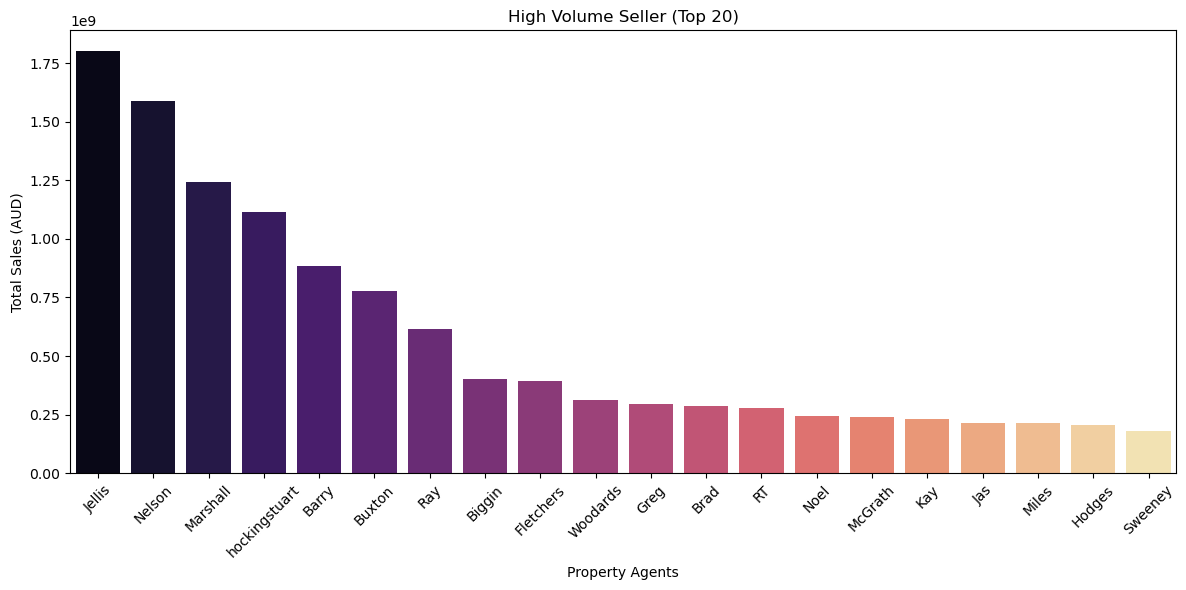

In [183]:
#chart for high volume sellers using pallete
plt.figure(figsize=(12, 6))
sns.barplot(x=melb_agent_total.index, y=melb_agent_total.values, palette='magma')

plt.title('High Volume Seller (Top 20)')
plt.xlabel('Property Agents')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_2146/3701785180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')


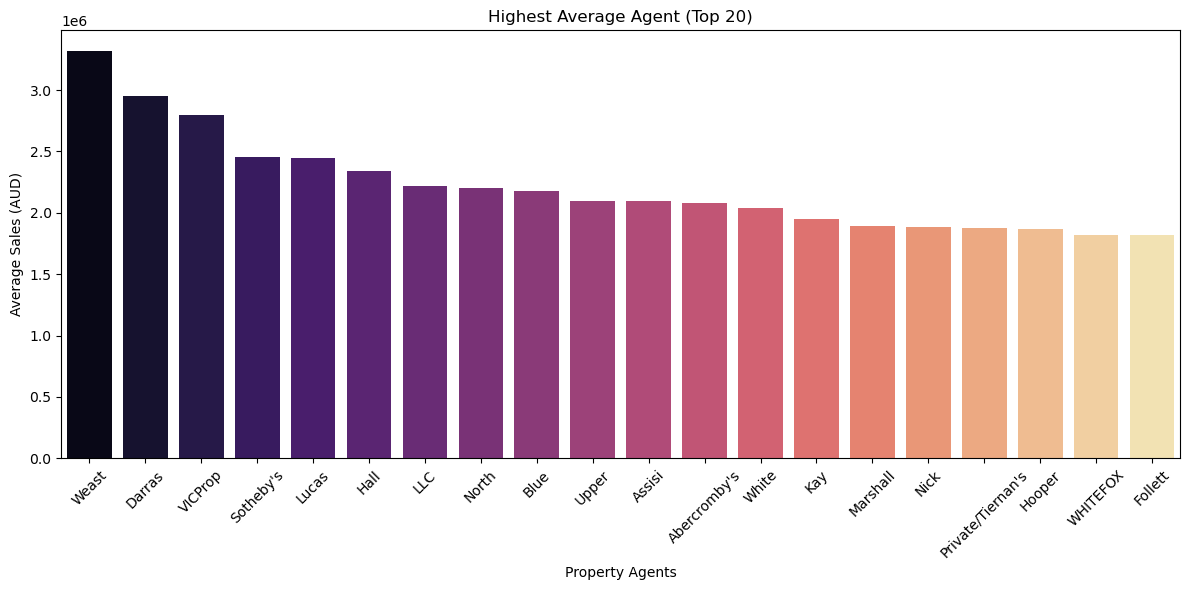

In [185]:
#chart for top 20 agent by average sales
plt.figure(figsize=(12, 6))
sns.barplot(x=melb_agent_avg.index, y=melb_agent_avg.values, palette='magma')

plt.title('Highest Average Agent (Top 20)')
plt.xlabel('Property Agents')
plt.ylabel('Average Sales (AUD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()